2. evaluer  avec les metriques: matrice de confusion, precision,recall


Refaire le travail avec un modele de classification automatique de detection de malware, au moyen du dataset ci-joint
En comparant les resulats avec un modele arbre de decision et  un modele de random forest

https://drive.google.com/drive/folders/1E0RpyEh0g42jFFsNVNm9QzAorSo4QtWq?usp=drive_link

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,  classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
file_path = data = pd.read_excel('DatasetmalwareExtrait.xlsx')

In [10]:
X = data.drop(columns=['legitimate'])
y = data['legitimate']

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
## Division les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
# Modèle Arbre de Décision
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [14]:
# Modèle Forêt Aléatoire
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [15]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

In [16]:
dt_recall = recall_score(y_test, y_pred_dt)
rf_recall = recall_score(y_test, y_pred_rf)

In [17]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

In [22]:
dt_report = classification_report(y_test, y_pred_dt)
rf_report = classification_report(y_test, y_pred_rf)

In [23]:
print("Performance de l'Arbre de Décision :")
print(dt_report)
print(f"Accuracy : {dt_accuracy:}")

Performance de l'Arbre de Décision :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19186
           1       0.98      0.98      0.98      8303

    accuracy                           0.99     27489
   macro avg       0.98      0.99      0.99     27489
weighted avg       0.99      0.99      0.99     27489

Accuracy : 0.9876314162028448


In [24]:
print("\nPerformance de la Forêt Aléatoire :")
print(rf_report)
print(f"Accuracy : {rf_accuracy:}")


Performance de la Forêt Aléatoire :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19186
           1       0.98      0.99      0.99      8303

    accuracy                           0.99     27489
   macro avg       0.99      0.99      0.99     27489
weighted avg       0.99      0.99      0.99     27489

Accuracy : 0.9915602604678235


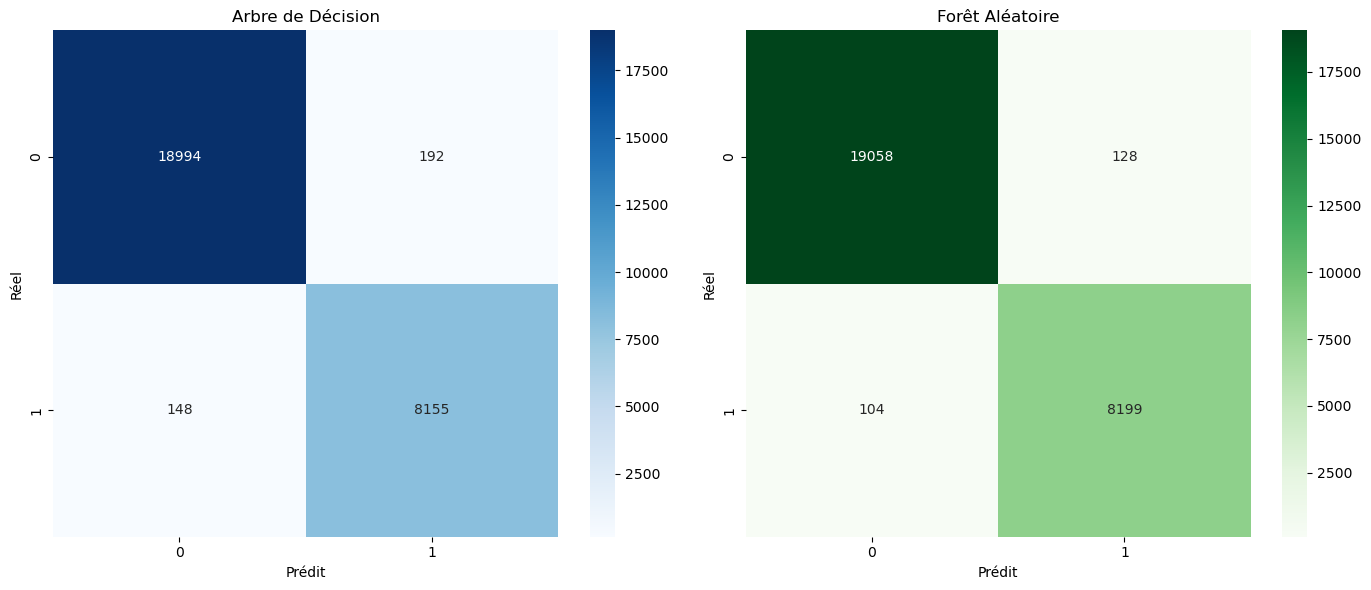

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Arbre de Décision")
ax[0].set_xlabel("Prédit")
ax[0].set_ylabel("Réel")

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Forêt Aléatoire")
ax[1].set_xlabel("Prédit")
ax[1].set_ylabel("Réel")

plt.tight_layout()
plt.show()

In [26]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna

In [27]:
# Step 1: Data Preparation
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Step 2: Model Definition
model = RandomForestClassifier(random_state=42)

In [29]:
# Step 3: Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

print("Running GridSearchCV...")
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_best_model = grid_search.best_estimator_
print("Best parameters from GridSearchCV:", grid_search.best_params_)

Running GridSearchCV...
Best parameters from GridSearchCV: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [30]:
# Step 4: Random Search
param_dist = {
    'n_estimators': np.arange(50, 201, 10),
    'max_depth': [None] + list(np.arange(5, 31, 5)),
    'min_samples_split': np.arange(2, 11),
}

print("Running RandomizedSearchCV...")
random_search = RandomizedSearchCV(model, param_dist, n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
random_best_model = random_search.best_estimator_
print("Best parameters from RandomizedSearchCV:", random_search.best_params_)

Running RandomizedSearchCV...
Best parameters from RandomizedSearchCV: {'n_estimators': 180, 'min_samples_split': 2, 'max_depth': 30}


In [31]:
# Step 5: Optuna Optimization
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

print("Running Optuna optimization...")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
optuna_best_params = study.best_params
print("Best parameters from Optuna:", optuna_best_params)

[I 2024-12-23 13:43:39,833] A new study created in memory with name: no-name-e5f07662-eead-4aeb-84c4-640f09e05a1a


Running Optuna optimization...


[I 2024-12-23 13:43:41,009] Trial 0 finished with value: 0.895 and parameters: {'n_estimators': 88, 'max_depth': 23, 'min_samples_split': 10}. Best is trial 0 with value: 0.895.
[I 2024-12-23 13:43:41,651] Trial 1 finished with value: 0.91 and parameters: {'n_estimators': 60, 'max_depth': 9, 'min_samples_split': 4}. Best is trial 1 with value: 0.91.
[I 2024-12-23 13:43:43,378] Trial 2 finished with value: 0.91 and parameters: {'n_estimators': 185, 'max_depth': 25, 'min_samples_split': 4}. Best is trial 1 with value: 0.91.
[I 2024-12-23 13:43:44,707] Trial 3 finished with value: 0.89 and parameters: {'n_estimators': 162, 'max_depth': 6, 'min_samples_split': 4}. Best is trial 1 with value: 0.91.
[I 2024-12-23 13:43:46,217] Trial 4 finished with value: 0.915 and parameters: {'n_estimators': 164, 'max_depth': 10, 'min_samples_split': 4}. Best is trial 4 with value: 0.915.
[I 2024-12-23 13:43:48,423] Trial 5 finished with value: 0.915 and parameters: {'n_estimators': 192, 'max_depth': 15, '

Best parameters from Optuna: {'n_estimators': 189, 'max_depth': 12, 'min_samples_split': 2}


In [32]:
# Step 6: Evaluation
final_model = RandomForestClassifier(**optuna_best_params, random_state=42)
final_model.fit(X_train, y_train)
preds = final_model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Final model accuracy:", accuracy)

Final model accuracy: 0.925


In [33]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
import optuna

# Step 1: Data Preparation
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Bagging with Random Forest
print("Running Bagging with Random Forest...")
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)
print("Bagging Model Accuracy:", accuracy_score(y_test, bagging_preds))

# Step 3: Boosting with Gradient Boosting
print("Running Gradient Boosting...")
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
print("Gradient Boosting Model Accuracy:", accuracy_score(y_test, gb_preds))

# Step 4: Grid Search for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

print("Running GridSearchCV for Gradient Boosting...")
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
gb_best_model = grid_search_gb.best_estimator_

# Step 5: Optuna for Gradient Boosting
print("Running Optuna optimization for Gradient Boosting...")
def objective_gb(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 3, 7)

    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

study_gb = optuna.create_study(direction='maximize')
study_gb.optimize(objective_gb, n_trials=50)
optuna_best_params_gb = study_gb.best_params
print("Best parameters from Optuna for Gradient Boosting:", optuna_best_params_gb)

# Step 6: Evaluation of Best Gradient Boosting Model
final_gb_model = GradientBoostingClassifier(**optuna_best_params_gb, random_state=42)
final_gb_model.fit(X_train, y_train)
final_gb_preds = final_gb_model.predict(X_test)
print("Final Gradient Boosting Model Accuracy:", accuracy_score(y_test, final_gb_preds))


Running Bagging with Random Forest...


C:\Users\TOSHIBA\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Model Accuracy: 0.91
Running Gradient Boosting...
Gradient Boosting Model Accuracy: 0.88
Running GridSearchCV for Gradient Boosting...


[I 2024-12-23 13:46:51,206] A new study created in memory with name: no-name-35e9c39a-dbd8-4e57-9dc7-6888103c6b31


Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Running Optuna optimization for Gradient Boosting...


[I 2024-12-23 13:46:56,065] Trial 0 finished with value: 0.91 and parameters: {'n_estimators': 129, 'learning_rate': 0.1936259350297824, 'max_depth': 5}. Best is trial 0 with value: 0.91.
[I 2024-12-23 13:46:59,082] Trial 1 finished with value: 0.885 and parameters: {'n_estimators': 69, 'learning_rate': 0.16482332891366894, 'max_depth': 6}. Best is trial 0 with value: 0.91.
[I 2024-12-23 13:47:03,652] Trial 2 finished with value: 0.885 and parameters: {'n_estimators': 179, 'learning_rate': 0.08919033750588494, 'max_depth': 3}. Best is trial 0 with value: 0.91.
[I 2024-12-23 13:47:10,387] Trial 3 finished with value: 0.895 and parameters: {'n_estimators': 182, 'learning_rate': 0.03437221176690708, 'max_depth': 5}. Best is trial 0 with value: 0.91.
[I 2024-12-23 13:47:19,630] Trial 4 finished with value: 0.915 and parameters: {'n_estimators': 194, 'learning_rate': 0.17098562765822714, 'max_depth': 6}. Best is trial 4 with value: 0.915.
[I 2024-12-23 13:47:23,466] Trial 5 finished with va

Best parameters from Optuna for Gradient Boosting: {'n_estimators': 146, 'learning_rate': 0.18880449156276125, 'max_depth': 7}
Final Gradient Boosting Model Accuracy: 0.925


In [34]:
import pickle

# Sauvegarder le modèle
with open('modele_entraine.pkl', 'wb') as f:
    pickle.dump(final_model, f)

In [36]:
from sklearn.metrics import classification_report, accuracy_score

# Prédictions sur l'ensemble de test
y_pred = final_model.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred))

# Précision globale
print("Précision : ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       102
           1       0.89      0.97      0.93        98

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200

Précision :  0.925


In [40]:
import os

def extraire_caracteristiques(fichier):
    """
    Extraire des caractéristiques simples d'un fichier exécutable.
    :param fichier: Chemin du fichier à analyser.
    :return: Dictionnaire contenant les caractéristiques.
    """
    try:
        with open(fichier, 'rb') as f:
            contenu = f.read()
        return {
            'taille': len(contenu),  # Taille du fichier en octets
            'signature': contenu[:10]  # Les 10 premiers octets
        }
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier {fichier}: {e}")
        return None

# Chemin vers un fichier spécifique
chemin_fichier = 'Downloads/R-4.4.2-win.exe'

# Vérification que le fichier existe
if os.path.isfile(chemin_fichier):
    caracteristiques = extraire_caracteristiques(chemin_fichier)
    if caracteristiques:
        print("Caractéristiques du fichier :")
        print(caracteristiques)
else:
    print(f"Le fichier {chemin_fichier} n'existe pas.")

Le fichier Downloads/R-4.4.2-win.exe n'existe pas.
